In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Constants
DS = "../data/HR Employee Attrition.csv"
RANDOM_SEED = 42

# Read data set
df = pd.read_csv(filepath_or_buffer=DS)

#### Data Cleaning
- Indentify which columns have non numerical data
- Convert NaN data to numerical

In [2]:
# Identifying NaN Columns
NaN_columns = df.select_dtypes(exclude='number').columns.tolist()
for col in NaN_columns:
    print(col)
    print(df[col].unique())

Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


In [3]:
# Numerizing NaN columns
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True )
df["OverTime"].replace( {"Yes":1, "No":0}, inplace=True )
df["Over18"].replace( {"Y":1}, inplace=True)
df["BusinessTravel"].replace( {"Travel_Rarely":0.5, "Travel_Frequently":1, "Non-Travel":0}, inplace=True )
df["Gender"].replace( {"Female":1, "Male":0}, inplace=True )
df["MaritalStatus"].replace( {"Single":0, "Married":1, "Divorced":2}, inplace=True )
# Note: Columns [Department], [JobRole], [EducationField] wont be an input.
df.drop(columns=["Department", "JobRole", "EducationField"], inplace=True)

#### Training Model
Random Forest Regressor

In [5]:
def get_feature_importance(random_seed:int, data_set:pd.DataFrame, target_feature:str):
    # Separate traget column
    X = data_set.drop(target_feature, axis=1)
    y = data_set[target_feature]

    # Set model
    model = RandomForestRegressor(random_state=random_seed)
    model.fit(X, y)

    # Get feature importance
    feature_importances = model.feature_importances_
    feature_names = X.columns
    importance_dict = dict(zip(feature_names, feature_importances))

    return np.array(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

#### Experiment 1
Find out which columns/employee attributes, contribute the most to employee attrition?

In [6]:
# Get feature importance scores
ft_importance = get_feature_importance(data_set=df, random_seed=RANDOM_SEED, target_feature="Attrition")
# Higher score means that columns affects the target column the most

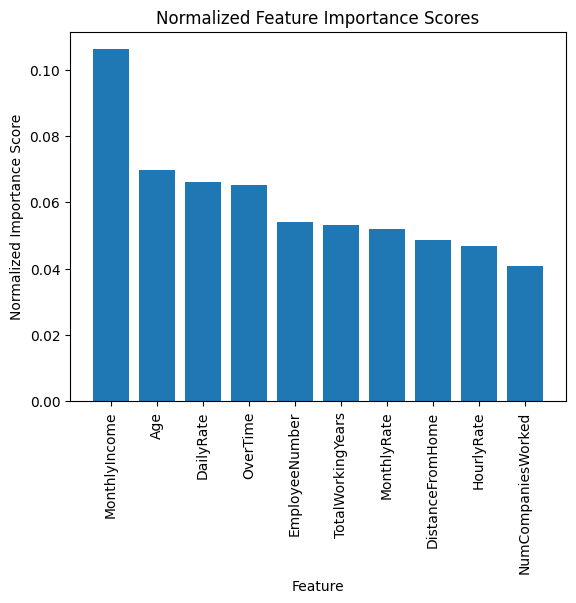

<Figure size 1000x1000 with 0 Axes>

In [25]:
# Graphing the 10 most influential columns
ft = ft_importance[:,1].astype("float") # str to float
ft = (ft / np.sum(ft))[:10]             # Normalize scores
plt.bar(ft_importance[:10,0], ft)
plt.xticks(rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Normalized Importance Score')
plt.title('Normalized Feature Importance Scores')
# Save Grpah
graph_path = "../graph/Feature-Importance-Graph.png"
plt.savefig(graph_path)
# Show graph
plt.figure(figsize=(10,10))
plt.show()


#### Experiment 2
Given the attributes of an employee, what is the probability of their attrition?

In [8]:
# Extract features (X) and target variable (y)
X = df.drop(["Attrition"], axis=1)
y = df['Attrition']

# one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=RANDOM_SEED)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
# TESTiNG | Delete
ft_importance[:,0][:10]

In [21]:
def run_attrition_simulation(model:RandomForestClassifier):
    attributes_required = ft_importance[:,0][:10]
    emp_info = np.empty(10)
    for idx, att in enumerate(attributes_required):
        user_input = input(f"Enter {att}: ")
        emp_info[idx] = float(user_input)

    return 


In [22]:
run_attrition_simulation(model)